<a href="https://colab.research.google.com/github/LaraV15/tpfinal/blob/main/Pr%C3%A1ctica_3_Lara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3: Algoritmos de Ordenamiento

In [ ]:
!pip install pytest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Probando cosas de la teoría

Ordenamiento por selección

In [ ]:

def ordenar_por_seleccion(A): #A es una lista
  n=len(A) #guardamos en n la cantidad de elementos a ordenar
  min = None #guardamos el mínimo encontrado en cada iteración
  pos = None #guardamos la posición donde se encuentra el mínimo
  for i in range(n-1):
    #Ordenamos el elemento en la posición i
    min = A[i]
    pos = i
    for j in range(i, n):
      if A[j] < min:
        #Actualizamos los valores de min y pos
        min = A[j]
        pos = j
    #Intercambiamos los valores en pos y en i
    A[pos], A[i]=A[i], A[pos]

B=[6,8,1,2,5,7,3]
ordenar_por_seleccion(B)
print(B)


[1, 2, 3, 5, 6, 7, 8]


Ordenamiento por insercción

In [ ]:
def ordenar_por_inserccion(A):
  n=len(A) #guardamos en n la cantidad de elementos a ordenar
  for i in range(1,n):
    #Insertamos el elemento de la posición i
    value=A[i] #arranca del segundo elemento 
    j=i-1 #la posición del primer elemento 
    while j>=0:
      if value <A[j]:
        #desplazamos el elemento de la posición j un lugar a la izq
        A[j+1] = A[j]
        j=j-1
      else:
        break
    #Almacenamos el valor actual en el lugar que nos quedo disponible
    A[j+1] = value

B=[6,8,1,2,5,7,3]
ordenar_por_inserccion(B)
print(B)

[1, 2, 3, 5, 6, 7, 8]


Quicksort (elección del pivote a ciegas)

In [ ]:
def elegir_pivote(A):
  #Tecnica de elección a ciegas
  #Elegimos el primer elemento de la sublista a ordenar
  return A[0]

def quicksort(A):
  if len(A)<2:
    #Caso base:listas trivialmente ordenadas
    return A
  
  #Elegimos el pivote
  pivote=elegir_pivote(A)
  #Usamos las listas por compresión para
  #obtener las sublistas que vamos a ordenar
  menores=[x for x in A if x<pivote]
  mayores=[x for x in A if x>pivote]
  #Llamos recursivamente a cada lado
  menores_ordenados =quicksort(menores)
  mayores_ordenados = quicksort(mayores)
  #Construimos la rta
  return menores_ordenados + [pivote]+mayores_ordenados
  
B=[6,8,1,2,5,7,3]
B=quicksort(B)
print(B)

[1, 2, 3, 5, 6, 7, 8]


#**Ejercicio 1**: 
Implementar una cola de prioridad que internamente mantenga los elementos ordenados utilizando ordenamiento por inserción

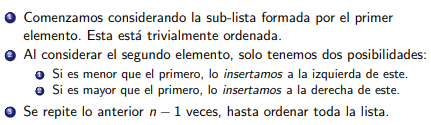

In [ ]:
%%file test_priority_queue.py

class PriorityQueue(): #los dos primeros métodos son como lo vimos en la unidad 1
  def __init__ (self):
    self.lista = []
  
  def isEmpty (self):
    return self.lista == []
  
  def insert (self , item): 
    if len(self.lista) == 0:
      self.lista.append(item)
    else:
      for i in range(len(self.lista)):
        if item > self.lista[i]:
          continue
        else: 
          self.lista.insert(i,item)
          return #para que no siga
      self.lista.append(item)
      
    def __str__(self):
      return f"{self.lista}"
          
#TEST
def test_inserccion():
  lista = PriorityQueue()
  lista.insert(2)
  lista.insert(0)
  lista.insert(3)
  assert lista.lista == [0,2,3]
    

In [ ]:
#cosas que voy probando
a = []
print(len(a))
for i in range(5):
  print(i)

a = [1,2,3]
a.insert(1,4) #(posición, elemento)
print(a)

In [ ]:
!python -m pytest

Otra forma de hacer el insert

In [ ]:
%%file test_priority_queue.py


# OTRA FORMA (más corta)

class PriorityQueue : #los dos primeros métodos son como lo vimos en la unidad 1
  def __init__ (self, lista):
    self.lista = lista
  
  def isEmpty (self):
    return self.lista == []
  
  def insert (self , item): 
    if len(self.lista) == 0:
      self.lista.append(item)
    else:
      for i in range(len(self.lista)):
        if item < self.lista[i]:
          self.lista.insert(i,item)
          break #para que no siga     
    

#**Ejercicio 2**: 
Escribir una función que verifique eficientemente si una lista está ordenada, utilícela para implementar _bogosort_:

_**bogosort** es un algoritmo de ordenamiento que mezcla la lista al azar hasta que esté ordenada. Este método fue creado en broma por lo ineficiente que es._

**Nota** Puede ser de utilidad la [funcion](https://docs.python.org/3/library/random.html#random.shuffle) `shuffle` del modulo `random`. 

Utilice bogosort para ordenar ```[1, 2, 3, 4, 5]``` y observe el tiempo que le toma.

In [ ]:
%%file test_bogosort.py
from random import shuffle


def esta_ordenada(lista):
  if len(lista) < 2: 
    return True #pues esta ordenada
  for i in range(len(lista) - 1):
    if lista[i] > lista[i + 1]:
      return False
  return True

def bogosort(lista):
  while not esta_ordenada(lista): #cuando de False lo convierte en True y entra al while
    shuffle(lista)
  return lista


def test_bogosort():
  myList = [2,1,3,5,4,7,6,8,9,10]
  assert bogosort(myList) == [1,2,3,4,5,6,7,8,9,10]

Overwriting test_bogosort.py


In [ ]:
!python -m pytest

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 1 item                                                               

test_bogosort.py .                                                       [100%]

=========================== 1 passed in 5.37 seconds ===========================


#**Ejercicio 3**: 
Se les da una lista de números enteros. Determinar la cantidad de elementos únicos, o sea, la cantidad de elementos ignorando los repetidos.

**Ayuda** puede ser de utilidad la estructura `set`.

```
[1, 5, 3, 3, 5, 1]
# Salida: 3
```

Resolver de forma eficiente: que sea capaz de computar la solución para una lista de 10000 elementos en aproximádamente un segundo.

In [ ]:
%%file test_distinct_numbers.py
import random


def distinct(lista):
  lista = sorted(lista)
  unicos = 0
  actual = None
# [1, 5, 3, 3, 5, 1] ---> [1, 1, 3, 3, 5, 5]
  for elemento in lista:
    if actual != elemento:
      unicos += 1
      actual = elemento
  return unicos

def test_distinct():
  myList = [1]
  assert distinct(myList) == 1
  myList = [1, 1]
  assert distinct(myList) == 1
  myList = [1, 5, 3, 3, 5, 1]
  assert distinct(myList) == 3
  myList = list(range(1,10000)) #crea una lista del 1, al 9999
  random.shuffle(myList)
  assert distinct(myList) == 9999
  myList = [random.choice([1,2,3,4]) for x in range(10000)]
  assert distinct(myList) == 4


Writing test_distinct_numbers.py


In [ ]:
!python -m pytest

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 2 items                                                              

test_bogosort.py .                                                       [ 50%]
test_distinct_numbers.py .                                               [100%]

========================== 2 passed in 62.35 seconds ===========================


In [ ]:
#Probando cosas
listaPrueba = list(range(1,10))
print(listaPrueba)


[1, 2, 3, 4, 5, 6, 7, 8, 9]


#**Ejercicio 4**: 
Reescribir quicksort para que tenga un parámetro más: una función de comparación. La función de comparación es aquella que, dados dos elementos de la lista, devuelve True si el primero debería ir antes, o False si el segundo debería ir antes.

In [ ]:
#Esto es el método quicksort tradicional

#elección a ciegas

def elegir_pivot(lista):
  return lista[0] #Elegimos el primer elemento como pivote

def quicksort(lista):
  if len(lista) <2:
    return lista #si tiene menos de dos elementos ya esta ordenada

  pivot = elegir_pivot(lista)
  menores = [x for x in lista if x< pivot]
  mayores =[x for x in lista if x> pivot]

  return quicksort(menores) + pivot + quicksort(mayores)

In [ ]:
!python -m pytest

**Hecho en clase**

In [ ]:
%%file test_higher_order_quicksort.py
from random import randint
# eleccion a ciegas
def elegir_pivot(lista):
  return lista[0]

# def quicksort(lista):
#   if len(lista) < 2:
#     return lista
  
#   pivot = elegir_pivot(lista)
#   menores = [x for x in lista if x < pivot]
#   mayores = [x for x in lista if x > pivot]

#   return quicksort(menores) + [pivot] + quicksort(mayores)

def cmp(a,b):
  if a < b:
    return -1
  if a == b:
    return 0
  else:
    return 1


def quicksort(lista, compare):
  if len(lista) < 2:
    return lista
  
  pivot = elegir_pivot(lista)
  menores = [x for x in lista if compare(x,pivot) == -1]
  mayores = [x for x in lista if compare(x,pivot) == 1] # TODO: cambiar condicion por >= 0 y ver que pasa

  return (quicksort(menores, compare) + [pivot] + quicksort(mayores, compare))

'''
QUICKSORT CON DUPLICADOS - UTIL PARA EJERCICIO 10
Para mantener los duplicados, agregamos la condicion <= o >= para agregarlos 
a la sublista de menores o mayores respectivamente.
En este caso agregamos los duplicados a la lista de menores.
Como no tenemos un identificador único para nuestros elementos, si trabajamos
unicamente con el valor del pivot, no podriamos distinguirlo y lo estariamos 
agregando a la lista de menores (provocando una recursion infinita).
La condicion "and index != pivotIndex" evita que agreguemos el pivot a la lista.
'''

def quicksortDuplicates(lista, compare):
  if len(lista) < 2:
    return lista

  pivotIndex = 0 # mantengo la eleccion de pivot a ciegas
  # pivotIndex = randint(0, len(lista) - 1) # eleccion de pivot al azar
  pivot = lista[pivotIndex]
  menores = [x for index,x in enumerate(lista) if compare(x,pivot) <= 0 and index != pivotIndex] # and i != pivotIndex --> esta condicion es la que evita la recursion inf
  mayores = [x for x in lista if compare(x,pivot) == 1]

  return quicksortDuplicates(menores, compare) + [pivot] + quicksortDuplicates(mayores, compare)

def quicksortDuplicates(lista, compare):
  if len(lista) < 2:
    return lista

  pivot = elegir_pivot(lista)
  menores = [x for index,x in enumerate(lista) if compare(x,pivot) == -1] 
  mayores = [x for x in lista if compare(x,pivot) == 1]
  igualesPivot = [x for x in lista if compare(x,pivot) == 0]

  return quicksortDuplicates(menores, compare) + igualesPivot + quicksortDuplicates(mayores, compare)


def test_quicksort():
  myList = [2,6,20,5,4,3,1,9]
  assert quicksort(myList,cmp) == [1,2,3,4,5,6,9,20]
  myList = [2,6,20,5,2,4,3,20,1,9]
  assert quicksortDuplicates(myList, cmp) == [1,2,2,3,4,5,6,9,20,20]


#**Ejercicio 5**: 
Se tiene la clase de tiempo mostrada a continuación, almacena horas, minutos y segundos:
```python
class Time:
  def __init__(self, hh, mm, ss):
    self.hh = hh
    self.mm = mm
    self.ss = ss
```
Definir los operadores relacionales necesarios para poder ordenar una lista de tiempos utilizando uno de los algoritmos generalizados.

In [ ]:
%%file test_time_sort.py

class Time:
  def __init__(self, hh, mm, ss):
    self.hh = hh
    self.mm = mm
    self.ss = ss
  
  def __str__(self):
    return f"{self.__formatTime(self.hh)}:{self.mm}:{self.ss}"

#esta función para que me agrege un cero, si las hh, min o seg tiene un sólo dígito
  def __formatTime(self,num):
    return f"{num}" if num >9 else f"0{num}"

def compare(a,b):
  if a.hh < b.hh:
    return -1
  if a.hh == b.hh and a.mm == b.mm and a.ss == b.ss:
    return 0
  if a.hh > b.hh:
    return 1
  #si no entro a ninguno de los if
  #significa que a.hh == b.hh pero min y/o seg son iguales
  if a.mm < b.mm:
    return -1
  if a.mm > b.mm:
    return 1
  #si llego acá es porque los minutos son iguales
  #pero los segundos no
  if a.ss < b.ss:
    return -1
  else: 
    return 1

def elegir_pivot(lista):
  return lista[0]

def quicksort(lista, compare):
  if len(lista) < 2:
    return lista
  
  pivot = elegir_pivot(lista)
  menores = [x for x in lista if compare(x,pivot) == -1]
  mayores = [x for x in lista if compare(x,pivot) == 1] 

  return (quicksort(menores, compare) + [pivot] + quicksort(mayores, compare))

def test_time_sort():
  time1 = Time(13,7,59)
  time2 = Time(15,1,32)
  time3 = Time(13,6,59)
  myList = [time1, time2, time3]
  assert quicksort(myList, compare) == [time3, time1, time2]


myList = [Time(13,7,59), Time(15,1,32), Time(13,6,59)]
myList = quicksort(myList, compare)
for tiempo in myList:
  print(tiempo)

Overwriting test_time_sort.py


In [ ]:
!python -m pytest

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 1 item                                                               

test_time_sort.py .                                                      [100%]

=========================== 1 passed in 0.02 seconds ===========================


#**Ejercicio 6**: 
Quicksort es lento en un caso muy particular ¿Se le ocurre algún método para solucionar, o subsanar el problema? Impleméntelo y pruebe si el peor caso mejora

In [ ]:
%%file test_quicksort_fix.py
import random

#Mal rendimiento cdo el pivote es el mayor o el menor de la lista

# Elección a ciegas
def elegir_pivote(lista):
  return lista[0]

#Elección al azar
def elegir_pivote_dos(lista):
  return random.choice(lista)

#Elección Calculada (elemento del medio)
def elegir_pivote_tres(lista):
  #tarea / consulta
  return

#Elección El mejor de tres (mejor opción)
def elegir_pivote_cuatro(lista):
  #deberiamos chequear el temaño de la lista
  listaAux = sorted([lista[0], lista[1], lista[-1]])
  return listaAux[1]


Writing test_quicksort_fix.py


In [ ]:
!python -m pytest

#**Ejercicio 7**: 
Implemente un algoritmo de ordenamiento mixto, que cuando hayan mucho elementos utilice quicksort, y que use otro método en otro caso. Elija la cantidad de elementos para la cual hacer el cambio. Esperamos que el algoritmo sea rápido para listas de cualquier tamaño. Compare el tiempo de quicksort normal con este método mixto.

In [ ]:
%%file test_mixed_sort.py
import random

def elegir_pivot(lista):
  return lista[0]

def quicksort(lista):
  if len(lista) <2:
    return lista

  pivot = elegir_pivot(lista)
  menores = [x for x in lista if x< pivot]
  mayores =[x for x in lista if x> pivot]

  return quicksort(menores) + [pivot] + quicksort(mayores)

def ordenar_por_insercion(lista):
  # Guardamos en n la cantidad de elementos a ordenar
  n=len(lista)
  for i in range (1,n):
  # Insertamos el elemento en la posición i
    value = lista[i]
    j = i-1
    while j >= 0:
      if value < lista[j]:
      # Desplazamos el elemento en la posicion j
      # un lugar a la izquierda 
        lista[j+1], lista[j] = lista[j], lista[j+1]
        j = j - 1
      else:
        break
# Almacenamos el valor actual en el lugar que nos quedo disponible
    lista[j+1] = value
  return lista

def mixed_sort(lista):
  if len(lista)>100:
    lista = quicksort(lista)
  else:
    lista = ordenar_por_insercion(lista)

  return lista

def test_mixed_sort():
  miLista = [8,4,8,7,5,6,1,5]
  lista_ordenada = mixed_sort(miLista)
  assert lista_ordenada == [1,4,5,5,6,7,8,8]
  miLista_uno=list(range(1,200))
  random.shuffle(miLista_uno)
  miLista_uno_ordenada=mixed_sort(miLista_uno)
  assert miLista_uno_ordenada == list(range(1,200))

Writing test_mixed_sort.py


In [ ]:
!python -m pytest

============================= test session starts ==============================
platform linux -- Python 3.7.15, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 1 item                                                               

test_mixed_sort.py .                                                     [100%]

=========================== 1 passed in 0.02 seconds ===========================


In [ ]:
#Probando cosas

import random

a = list(range(1,10))

print(a==list(range(1,10)))
print(a)
random.shuffle(a)

print(a)


True
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[4, 5, 7, 9, 6, 3, 1, 2, 8]


#**Ejercicio 8**: 
Medir el tiempo de los algoritmos de ordenamiento vistos en clase a medida que incrementamos la cantidad de elementos. Para esto, usaremos

```python
from time import time
from random import shuffle

# N y B a elección

tiempos = []
for i in range(N):
  
  lista = list(range(B * i))
  
  shuffle(lista)
  
  inicial = time()
  ordenar(lista)
  final = time()
  
  tiempos.append(final - inicial)
```

Repetir para cada método de ordenamiento y graficar los tiempos usando _pyplot_, comparar cada algoritmo.

¿Cuál es el peor caso de cada algoritmo?

Repetir la experiencia, pero siempre produciendo la peor entrada posible para cada algoritmo.

In [ ]:
from time import time
from random import shuffle

N=100

tiempos = []
for i in range(N):
  lista = list(range(B * i))
  shuffle(lista)
  
  inicial = time()
  ordenar(lista)
  final = time()
  
  tiempos.append(final - inicial)


NameError: ignored

In [ ]:
%%file test_time_graphs.py

# Código

In [ ]:
!python -m pytest

#**Ejercicio 9** 
Realizar un análisis de eficiencia para el algoritmo de ordenamiento por inserción.

#**Ejercico 10** 
Extienda Quicksort para poder ordenar listas con elementos repetidos. ¿Cuántas comparaciones son necesarias cuando pasamos una lista que tiene siempre el mismo elemento?

In [ ]:
import random
#Elección caculada


#Mejor de 3
def elegir_pivot(lista):
  if len(lista)>2:
    a=[lista[0],lista[1],lista[-1]]
    a.remove(min(a))
    a.remove(max(a))
    return a[0]
  else:
    return lista[0]
  

#Elección al azar
'''def elegir_pivot(lista):
  return random.choice(lista)'''

#Elección a ciegas
'''def elegir_pivot(lista):
  return lista[0] #Elegimos el primer elemento como pivote'''

def quicksort(lista):
  if len(lista) <2:
    return lista #si tiene menos de dos elementos ya esta ordenada

  pivot = elegir_pivot(lista)
  menores = [x for x in lista if x< pivot]
  mayores =[x for x in lista if x> pivot]
  iguales =[x for x in lista if x== pivot]

  return quicksort(menores) +iguales + quicksort(mayores)

l=[1,2,5,4,1,4,6]
print(quicksort(l))

[1, 1, 2, 4, 4, 5, 6]


In [ ]:
!python -m pytest

#**Ejercicio 11** 
Dada `A = range(5)` encuentre:

a) La peor permutación de la lista para el algoritmo de selección,

b) La peor permutación de la lista para el algoritmo de quicksort, para cada posible elección del pivote.